# **Aula 13 - DDS4 - Machine Learning com PyCaret**

## **DADOS DE CUSTOS MÉDICOS**

In [1]:
#instalar pycaret

In [8]:
from pycaret.datasets import get_data
dados = get_data('insurance') 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


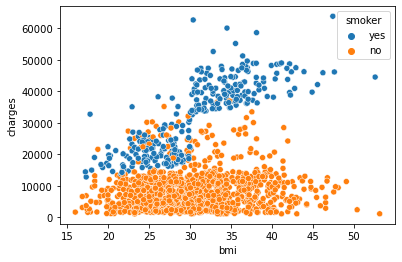

In [9]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---

## **Objetivo Primário: construir um bom modelo para previsão dos custos médicos de uma pessoa**

In [10]:
from pycaret.regression import * 

In [11]:
?setup

In [12]:
# setup
regressao = setup(data = dados, target = 'charges')

,Description,Value
0,session_id,408
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [13]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [14]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2579.5858,18089391.1697,4253.1625,0.8847,0.4263,0.3419
1,2525.6779,22516800.2052,4745.1871,0.8427,0.4113,0.3161
2,2324.4099,20683230.8376,4547.8820,0.8534,0.4057,0.2873
3,2171.7538,12690363.2348,3562.3536,0.8912,0.4474,0.3821
4,3104.6976,32966974.5047,5741.6874,0.7331,0.4914,0.3234
5,2268.8307,19486396.4609,4414.3399,0.8767,0.4970,0.2361
6,2524.6079,20310983.3346,4506.7708,0.8796,0.4062,0.2616
7,2791.5500,26269947.4173,5125.4217,0.8083,0.4296,0.3269
8,2881.9587,27360325.3801,5230.7098,0.7599,0.5623,0.2933
9,3041.3835,31388647.9033,5602.5573,0.8190,0.4905,0.3254


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2461.6874,18419771.0416,4291.8261,0.8679,0.4012,0.2939
1,2387.9277,18121431.0526,4256.9274,0.8924,0.3926,0.2454
2,2361.1007,18968950.2073,4355.3358,0.8758,0.4168,0.2804
3,2440.2850,19531798.6328,4419.4795,0.8820,0.4379,0.3261
4,2471.2078,21129854.9900,4596.7222,0.8106,0.4431,0.2919
5,3328.7562,38674962.1978,6218.9197,0.7708,0.5303,0.3012
6,2221.6818,13150389.3889,3626.3466,0.8817,0.4210,0.3798
7,2728.9398,28516527.3197,5340.0868,0.8067,0.4730,0.2330
8,1908.5730,12215770.7870,3495.1067,0.9312,0.2495,0.1820
9,2606.7122,29219178.1944,5405.4767,0.6940,0.4735,0.2714


In [15]:
rf_tunado = tune_model(rf, optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1904.6429,15245764.1179,3904.5825,0.9029,0.3439,0.1991
1,1962.8858,18899897.2093,4347.4012,0.8680,0.3153,0.1753
2,1701.5759,16165251.8729,4020.6034,0.8854,0.2822,0.1418
3,1330.9655,7126391.3234,2669.5302,0.9389,0.2770,0.1689
4,2364.4536,28361636.6829,5325.5644,0.7704,0.4412,0.1918
5,1915.2578,17203990.6872,4147.7694,0.8912,0.4581,0.1645
6,1886.2184,16909323.0456,4112.0947,0.8998,0.3424,0.1550
7,2366.0575,25935145.0781,5092.6560,0.8107,0.3472,0.1889
8,2319.6583,23868664.1817,4885.5567,0.7905,0.5123,0.1730
9,2275.6470,29138219.5819,5397.9829,0.8320,0.4197,0.1694


In [6]:
# Comparando os modelos implementados, ordenando pelo RMSLE
melhores = compare_models(sort = 'RMSLE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2560.7411,20787396.4915,4470.0112,0.8546,0.4082,0.2837,0.0180
rf,Random Forest Regressor,2666.8075,22423052.5592,4654.5642,0.8442,0.4324,0.3078,0.0720
catboost,CatBoost Regressor,2693.2286,23235141.5508,4752.1933,0.8382,0.4428,0.3000,0.7170
et,Extra Trees Regressor,2706.0605,26716780.4736,5093.1454,0.8152,0.4537,0.3160,0.0700
huber,Huber Regressor,3672.1721,48012336.6354,6865.4042,0.6634,0.4834,0.2301,0.0110
lightgbm,Light Gradient Boosting Machine,2771.6313,22561385.2395,4664.8012,0.8425,0.4931,0.3339,0.0400
dt,Decision Tree Regressor,3173.0953,41538914.8841,6350.5804,0.7131,0.5085,0.3665,0.0050
xgboost,Extreme Gradient Boosting,2974.2873,27073155.7000,5137.5916,0.8122,0.5136,0.3498,0.1750
ada,AdaBoost Regressor,3772.9058,24386621.6047,4901.9707,0.8302,0.5639,0.5942,0.0070
par,Passive Aggressive Regressor,4964.8047,59223791.5976,7630.8910,0.5920,0.5831,0.4431,0.0070


In [7]:
melhores

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1162, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_s

In [14]:
melhores_tunados = []

for i in range(len(melhores)):
    melhores_tunados.append(tune_model(melhores[i], optimize = 'RMSLE'))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3872.9015,64329057.1355,8020.5397,0.5387,0.4123,0.1867
1,4190.1138,76356288.2257,8738.2085,0.5467,0.4200,0.1757
2,3907.4722,66749227.1763,8170.0200,0.5629,0.4272,0.1845
3,4288.6639,78747370.2144,8873.9715,0.5244,0.4212,0.1875
4,3383.0802,50869110.9873,7132.2585,0.5441,0.4765,0.1832
5,4544.5084,87746335.0252,9367.3014,0.4800,0.5107,0.2001
6,2536.4792,35840830.1666,5986.7212,0.6776,0.3466,0.1528
7,4201.8807,70774021.3502,8412.7297,0.5203,0.5415,0.2056
8,4154.0764,78120976.7319,8838.6072,0.5599,0.3987,0.1884
9,2832.6902,43620035.6053,6604.5466,0.5431,0.4221,0.1583


In [9]:
modelo_combinado = blend_models(melhores_tunados)

NameError: name 'melhores_tunados' is not defined

In [16]:
# Performance nos dados de validacao
pred = predict_model(modelo_combinado)
pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2662.8102,27595733.5794,5253.1641,0.8153,0.4138,0.2089


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,0.547918,-0.685931,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9715.840820,10572.579413
1,-1.096754,0.051409,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,34254.054688,29815.661766
2,0.976963,-1.627216,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,21195.818359,23936.068666
3,-0.095649,-2.301803,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6640.544922,6693.887744
4,0.047366,0.020033,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8162.716309,9064.700041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,-1.454291,-0.827124,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2710.828613,3439.926025
398,-0.524694,0.396546,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6128.797363,5948.203837
399,0.047366,-0.936940,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5415.661133,5684.261228
400,-1.454291,-0.388683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1842.519043,2324.860132


In [17]:
pred['Label']

0      10572.579413
1      29815.661766
2      23936.068666
3       6693.887744
4       9064.700041
           ...     
397     3439.926025
398     5948.203837
399     5684.261228
400     2324.860132
401    11503.920598
Name: Label, Length: 402, dtype: float64

In [8]:
evaluate_model(modelo_combinado)


NameError: name 'modelo_combinado' is not defined

In [19]:
# Utilizando o modelo escolhido nos dados todos para gerar o modelo final
modelo_final = finalize_model(modelo_combinado)

In [20]:
predict_model(modelo_combinado)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2662.8102,27595733.5794,5253.1641,0.8153,0.4138,0.2089


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,0.547918,-0.685931,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9715.840820,10572.579413
1,-1.096754,0.051409,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,34254.054688,29815.661766
2,0.976963,-1.627216,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,21195.818359,23936.068666
3,-0.095649,-2.301803,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6640.544922,6693.887744
4,0.047366,0.020033,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8162.716309,9064.700041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,-1.454291,-0.827124,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2710.828613,3439.926025
398,-0.524694,0.396546,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6128.797363,5948.203837
399,0.047366,-0.936940,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5415.661133,5684.261228
400,-1.454291,-0.388683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1842.519043,2324.860132


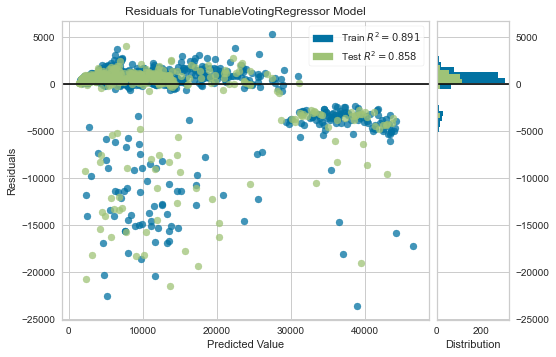

In [21]:
plot_model(modelo_final)


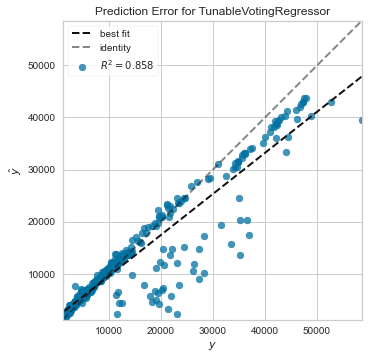

In [23]:
# Salvando o modelo
save_model(modelo_final, 'meu-melhor-modelo-para-charges')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                                          min_samples_split=10,
                                                                          min_weight_fraction_leaf=0.0,
                                                                          n_estimators=270,
                     

---

In [11]:
# Deploy Básico

def CustoSeguro(age, sex, bmi, children, smoker, region):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('meu-melhor-modelo-para-charges')

    pred = float(predict_model(modelo, data = dados)['Label'].round(2))
    valor = round(1.8*pred, 2)
    
    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Fumante: {}'.format(smoker))
    print('Região: {}'.format(region))
    print(' ')
    print('Custo do Seguro: ${}'.format(pred))
    print('Valor de Venda: ${}'.format(valor))


In [13]:
CustoSeguro(age = 34, sex = 'male', bmi = 30, children = 0, smoker =  'yes', region = 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 34
Sexo: male
IMC: 30
Crianças: 0
Fumante: yes
Região: southwest
 
Custo do Seguro: $25367.53
Valor de Venda: $45661.55


In [26]:
CustoSeguro(45, 'female', 20, 2, 'yes', 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 45
Sexo: female
IMC: 20
Crianças: 2
Fumante: yes
Região: southwest
 
Custo do Seguro: $21962.68
Valor de Venda: $39532.82


---

## **Objetivo secundário: construir um modelo para detectar fumantes e possíveis fraudadores dessa variável.**

In [27]:
from pycaret.classification import *

In [28]:
class_setup = setup(data = dados,
                    target = 'smoker',
                    normalize = True, 
                    ignore_low_variance = True,
                    remove_multicollinearity = True, 
                    multicollinearity_threshold = 0.95,
                    n_jobs = 2)

,Description,Value
0,session_id,4046
1,Target,smoker
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1338, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [30]:
todos = compare_models(n_select = 18, turbo = False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9712,0.9920,0.9667,0.8962,0.9286,0.9106,0.9128,0.6330
xgboost,Extreme Gradient Boosting,0.9637,0.9889,0.9278,0.8940,0.9091,0.8865,0.8878,0.0720
lightgbm,Light Gradient Boosting Machine,0.9626,0.9897,0.9389,0.8809,0.9073,0.8840,0.8860,0.0260
gbc,Gradient Boosting Classifier,0.9605,0.9851,0.9278,0.8790,0.9007,0.8762,0.8782,0.0550
rbfsvm,SVM - Radial Kernel,0.9583,0.9827,0.9944,0.8280,0.9027,0.8766,0.8832,0.0170
dt,Decision Tree Classifier,0.9541,0.9314,0.8944,0.8799,0.8840,0.8556,0.8579,0.0060
ada,Ada Boost Classifier,0.9487,0.9825,0.8667,0.8744,0.8671,0.8354,0.8378,0.0420
rf,Random Forest Classifier,0.9466,0.9863,0.8833,0.8465,0.8639,0.8307,0.8314,0.1070
mlp,MLP Classifier,0.9455,0.9833,0.8722,0.8527,0.8607,0.8269,0.8282,0.9550
lr,Logistic Regression,0.9423,0.9844,0.8444,0.8572,0.8489,0.8133,0.8147,0.0080


In [31]:
?compare_models

In [32]:
top7_tunados = [tune_model(i) for i in todos[:7]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9681,0.9942,0.9444,0.8947,0.9189,0.8991,0.8996
1,0.9787,0.9960,1.0000,0.9000,0.9474,0.9341,0.9361
2,0.9362,0.9883,1.0000,0.7500,0.8571,0.8171,0.8311
3,0.9787,0.9967,1.0000,0.9000,0.9474,0.9341,0.9361
4,0.9894,0.9971,1.0000,0.9474,0.9730,0.9664,0.9669
5,0.9362,0.9649,0.9444,0.7727,0.8500,0.8100,0.8166
6,0.9677,0.9956,0.8889,0.9412,0.9143,0.8944,0.8950
7,0.9570,0.9696,0.9444,0.8500,0.8947,0.8678,0.8697
8,0.9677,0.9926,0.9444,0.8947,0.9189,0.8988,0.8993
9,0.9462,0.9815,0.9444,0.8095,0.8718,0.8380,0.8420


In [33]:
top7_tunados

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.434, max_delta_step=0, max_depth=2,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=110, n_jobs=2, num_parallel_tree=1,
               objective='binary:logistic', random_state=4046, reg_alpha=1e-07,
               reg_lambda=0.15, scale_pos_weight=30.3, subsample=0.9,
               tree_method='auto', use_label_encoder=True, validate_parameters=1,
               verbosity=0),
 LGBMClassifier(bagging_fraction=1.0, bagging_freq=1, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
                importance_type='split', learning_rate=0.076, max_depth=-1,
                min_child_samples=75, min_child_weight=0.001, min_split_gain=0.3,
      

In [34]:
import pandas as pd
results = pd.DataFrame()

In [35]:
for i in range(len(top7_tunados)):
    ccc = predict_model(top7_tunados[i]) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9751,0.9966,0.9574,0.9375,0.9474,0.9311,0.9312


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9652,0.9946,0.9787,0.8846,0.9293,0.9063,0.9083


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9652,0.9933,0.9574,0.9000,0.9278,0.9049,0.9057


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9701,0.9970,0.9574,0.9184,0.9375,0.9179,0.9182


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.9701,0.9831,1.0000,0.8868,0.9400,0.9202,0.9232


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9652,0.9751,0.9681,0.8922,0.9286,0.9056,0.9069


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9652,0.9902,0.9681,0.8922,0.9286,0.9056,0.9069


In [36]:
combinacao_soft = blend_models(top7_tunados, method = 'soft') # os sete melhores modelos soltam probabilidades, então posso fazer combinação 'soft'

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9894,0.9971,1.0000,0.9474,0.9730,0.9664,0.9669
1,0.9681,0.9963,0.8889,0.9412,0.9143,0.8947,0.8952
2,0.9468,0.9832,1.0000,0.7826,0.8780,0.8447,0.8551
3,0.9787,0.9949,1.0000,0.9000,0.9474,0.9341,0.9361
4,0.9894,1.0000,1.0000,0.9474,0.9730,0.9664,0.9669
5,0.9362,0.9744,0.9444,0.7727,0.8500,0.8100,0.8166
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9570,0.9859,0.9444,0.8500,0.8947,0.8678,0.8697
8,0.9785,0.9956,1.0000,0.9000,0.9474,0.9339,0.9359
9,0.9570,0.9896,0.9444,0.8500,0.8947,0.8678,0.8697


In [37]:
combinacao_hard = blend_models(top7_tunados, method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9787,0.0000,1.0000,0.9000,0.9474,0.9341,0.9361
1,0.9894,0.0000,1.0000,0.9474,0.9730,0.9664,0.9669
2,0.9468,0.0000,1.0000,0.7826,0.8780,0.8447,0.8551
3,0.9787,0.0000,1.0000,0.9000,0.9474,0.9341,0.9361
4,0.9894,0.0000,1.0000,0.9474,0.9730,0.9664,0.9669
5,0.9362,0.0000,0.9444,0.7727,0.8500,0.8100,0.8166
6,0.9892,0.0000,1.0000,0.9474,0.9730,0.9663,0.9668
7,0.9570,0.0000,0.9444,0.8500,0.8947,0.8678,0.8697
8,0.9785,0.0000,1.0000,0.9000,0.9474,0.9339,0.9359
9,0.9570,0.0000,1.0000,0.8182,0.9000,0.8730,0.8801


Tanto as combinações 'hard' quanto 'soft' tiveram performances superiores a qualquer modelo individual. Por tanto, para modelo de produção, escolheremos a combinação 'soft', pois a 'hard' não solta probabilidades da variável resposta. 

In [38]:
preds = predict_model(combinacao_soft, data = dados)

In [39]:
preds.sample(20).sort_values(by = 'Score')

,age,sex,bmi,children,smoker,region,charges,Label,Score
1142,52,female,24.860,0,no,southeast,27117.99378,yes,0.7195
244,63,female,27.740,0,yes,northeast,29523.16560,yes,0.7746
417,36,female,22.600,2,yes,southwest,18608.26200,yes,0.8744
908,63,male,39.800,3,no,southwest,15170.06900,no,0.9125
39,60,male,39.900,0,yes,southwest,48173.36100,yes,0.9290
957,24,male,26.790,1,no,northwest,12609.88702,no,0.9303
1118,33,male,35.750,1,yes,southeast,38282.74950,yes,0.9590
574,57,female,34.295,2,no,northeast,13224.05705,no,0.9655
639,56,male,33.660,4,no,southeast,12949.15540,no,0.9656
35,19,male,20.425,0,no,northwest,1625.43375,no,0.9757


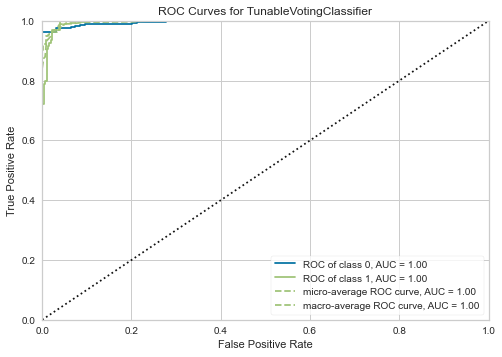

In [40]:
plot_model(combinacao_soft)

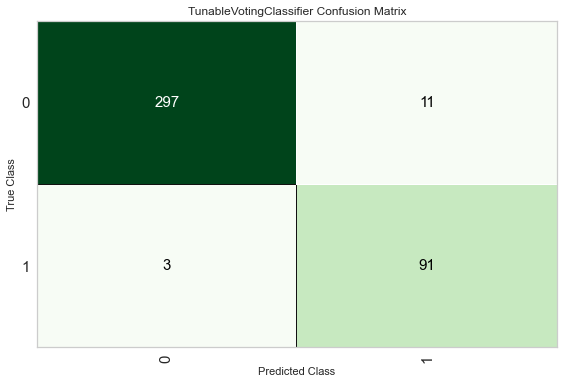

In [41]:
plot_model(combinacao_soft, plot = 'confusion_matrix')

---

In [42]:
pred = predict_model(combinacao_soft)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9652,0.9962,0.9681,0.8922,0.9286,0.9056,0.9069


## Utilizando a função predict_proba podemos tomar os valores das probabilidades dada pelo modelo. E podemos ver que o que acontece na variável 'Score' é que a probabilidade apresentada é sempre a de pertencer a resposta classificada, por isso então a suposta incoerência nos valores observados. 

---

## Utilizando o modelo selecionado na propria base para identificar possiveis fraudadores

In [43]:
pred = predict_model(combinacao_soft, data = dados)

## Queremos selecionar aqueles em que a resposta observada é não fumante, mas que nosso modelo indica que é fumante. Vamos ordenar o resultado pelo Score, pois quanto mais alto, maior a probabilidade ser fumante e, portanto, maior o risco de ser um fraudador. 

In [44]:
possiveis_fraudes = pred[(pred['Label'] == 'yes') & (pred['smoker'] == 'no')].sort_values(by = 'Score', ascending = False)
possiveis_fraudes

,age,sex,bmi,children,smoker,region,charges,Label,Score
115,60,male,28.595,0,no,northeast,30259.99556,yes,0.8195
340,24,female,27.600,0,no,southwest,18955.22017,yes,0.7943
1012,61,female,33.330,4,no,southeast,36580.28216,yes,0.7876
159,50,female,27.830,3,no,southeast,19749.38338,yes,0.7375
140,34,male,22.420,2,no,northeast,27375.90478,yes,0.7258
1142,52,female,24.860,0,no,southeast,27117.99378,yes,0.7195
688,47,female,24.100,1,no,southwest,26236.57997,yes,0.7078
987,45,female,27.645,1,no,northwest,28340.18885,yes,0.6198
242,55,female,26.800,1,no,southwest,35160.13457,yes,0.6132
599,52,female,37.525,2,no,northwest,33471.97189,yes,0.6102


## Portanto, o conjunto de dados acima é uma lista dos possíveis fraudadores, ordenada por aqueles mais prováveis de serem de fato fraudadores. Uma instituição poderia, por exemplo, tem um patamar em que caso a probabilidade seja maior que esse patamar, então uma investigação seria realizada. Por exemplo, se esse patamar fosse 70%, os individuos a serem investigados então seriam os seguintes:

In [45]:
investigar = possiveis_fraudes[possiveis_fraudes['Score'] > 0.7]
investigar

,age,sex,bmi,children,smoker,region,charges,Label,Score
115,60,male,28.595,0,no,northeast,30259.99556,yes,0.8195
340,24,female,27.600,0,no,southwest,18955.22017,yes,0.7943
1012,61,female,33.330,4,no,southeast,36580.28216,yes,0.7876
159,50,female,27.830,3,no,southeast,19749.38338,yes,0.7375
140,34,male,22.420,2,no,northeast,27375.90478,yes,0.7258
1142,52,female,24.860,0,no,southeast,27117.99378,yes,0.7195
688,47,female,24.100,1,no,southwest,26236.57997,yes,0.7078


In [46]:
modelo_final = finalize_model(combinacao_soft)

In [47]:
# Salvando o modelo
save_model(modelo_final, 'meu-melhor-modelo-para-smoker')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='smoker',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                                                              presort='deprecated',
                                                                              random_state=4046,
                                                                             

In [14]:
# Deploy Básico

def DetectorDeFumante(age, sex, bmi, children, region, charges):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'region': [region], 'charges': [charges]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('meu-melhor-modelo-para-smoker')
 
    pred = predict_model(modelo, data = dados)
    resp = 'NÃO' if pred['Label'][0] == 'no' else 'SIM' 
    prob = pred['Score'][0] 


    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Região: {}'.format(region))
    print('Custos: {}'.format(charges))
    print(' ')
    print('É fumante: {}, com probabilidade {:.2f}%'.format(resp, 100*prob)) 

In [18]:
DetectorDeFumante(age = 30, sex = 'male', bmi = 25, children = 0, region = 'southwest', charges = 2000)

Transformation Pipeline and Model Successfully Loaded
 
Idade: 30
Sexo: male
IMC: 25
Crianças: 0
Região: southwest
Custos: 2000
 
É fumante: SIM, com probabilidade 98.05%


In [21]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 50000)

Transformation Pipeline and Model Successfully Loaded
 
Idade: 30
Sexo: male
IMC: 25
Crianças: 0
Região: southwest
Custos: 50000
 
É fumante: SIM, com probabilidade 93.88%


## **Exercicio:** Utilize o PyCaret para tentar melhorar sua predição na competição do Titanic!